# HW 7

This assignment covers several aspects of Regularizations & Tree type Classifier. 
**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**

  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* See [README.md](README.md) for homework submission instructions

## Related Tutorials
    
* [Lasso Regression - L1 Regularization](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

* [Ridge Regression - L2 Regularization](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

* [Metrics : Precision-Recall curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

# Data Processing

**Data** 
* Get the exploratory data and the following files from [link](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)
* Save metadata and the original data from download [Link](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) to your local HW folder. 

```or```

You can use from the data folder in the 20222Spring repository.

**Q1** Get training data from the dataframe
1. Load breast-cancer-wisconsin.data into data frame
2. Note: the data file does not contains column names, so include appropriate column names by exploring the metadata file
3. Replace Non-Numeric values with 0
4. Replace Class label ```2 with 0``` and ```4 with 1```
5. Print head of the dataframe

**A1** Replace ??? with code in the code cell below

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#Read the breast-cancer-wisconsin.data file using the prropriate separator as input to read_csv()
column_names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion'
                ,'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
df = pd.read_csv('C:/Users/pedro/Documents/2022 Spring Semester/Machine Learning - CS 4347.252/2022Spring/data/breast-cancer-wisconsin.data',names = column_names, sep=',')
df.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [18]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [19]:
# Replace Non numeric values with 0 
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors = 'coerce').fillna(0).astype(int)

#Replace the Class label values following above given instructions
df['Class'].replace(2,0, inplace=True)
df['Class'].replace(4,1, inplace=True)

**Q2**

1. Assign values of ```Class``` column to ```y```, note you have to use ```.values``` method
2. Drop ```Class``` column from data frame,
3. Assign df values to x
4. Normalize the x dataset using sklearn StandardScaler 
5. Split dataset into train and test data use train_test_split with test_size = 0.2, stratify y and random_state = 1238

**A2** Replace ??? with code in the code cell below

In [20]:
# Assign values of ```Class``` column to y, note you have to use .values method
y = df.Class.values
# Drop 'Class' column from data frame,
df.drop(columns = ['Class'], inplace = True)
# Assign df values to x
x = df.values
# View shape of x and y
print(x.shape)
print(y.shape)


(699, 10)
(699,)


In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sample code number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.463519e+00,3.640708,0.0,1.0,1.0,5.0,10.0
Bland Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [22]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(x)
X_scaled= sc.transform(x)

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(X_scaled,y, test_size = 0.2, random_state = 1238, stratify = y)  

In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sample code number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.463519e+00,3.640708,0.0,1.0,1.0,5.0,10.0
Bland Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


# Model Regularization

## Ridge Regularization/ Ridge Regression

**Q3** Train Ridge Regularization Model
1. Create a Ridge Regularization Model using sklearn library, ```(See the documenttaion for details)```
2. Fit the model with the train data
3. Predict the values with the test data
4. Print the coefficients of the model
5. Calculate the test MSE 
6. Get the score from the model using test data
7. Plot Precision-Recall Curve from the true & predicted test data

**Note**
* Here we generate an array of cost values ranging from very big to very small 
  * cost here is variable alpha: alpha is equivalent to lambda in the lesson 13. 
 ![RidgeRegression](../figures/RidgeRegression.jpg) 
* Associated with each alpha value is a vector of ridge regression coefficients that we store in a matrix, with 100 rows (one for each value of alpha) and 10 columns (one for each predictor).  

**A3** Replace ??? with code in the code cell below

In [46]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

alphas = 0.5*(10**np.linspace(10,-2,100))
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_scaled, y)
    coefs.append(ridge.coef_)
    

pred1 = ridge.predict(xtest)   # Use this model to predict the test data
print(pd.Series(ridge.coef_,  index = df.columns)) # Print coefficients
mse = mean_squared_error(ytest, pred1)    # Calculate the test MSE
print("Test mean squared error (MSE): {:.2f}".format(mse))

print(ridge.score(xtest, ytest))

Sample code number            -0.005492
Clump Thickness                0.090089
Uniformity of Cell Size        0.067962
Uniformity of Cell Shape       0.051032
Marginal Adhesion              0.015905
Single Epithelial Cell Size    0.015844
Bare Nuclei                    0.166585
Bland Chromatin                0.050569
Normal Nucleoli                0.053877
Mitoses                        0.004013
dtype: float64
Test mean squared error (MSE): 0.03
0.8512905227365962


### Precision-Recall Curve for Ridge1

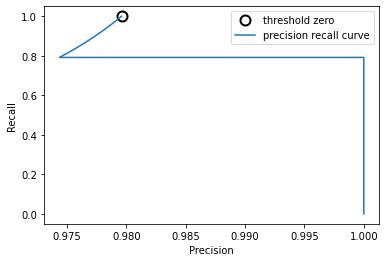

In [68]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

#pass necessary parameters to precision_recall_curve method  
precision, recall, thresholds = precision_recall_curve(ytest, pred1)

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")


**Q4** Train Ridge Regression Model on the training set, and evaluate
1. Now, Create a Ridge Regression passing ```alpha = 4```
2. Fit the model with the train data
3. Predict the values with the test data
4. Print the coefficients of the model
5. Calculate the test MSE 
6. Get the score from the model using test data
7. Plot Precision-Recall Curve from the true & predicted test data

**A4** Replace ??? with code in the code cell below

In [52]:
ridge2 = Ridge(alpha = 4)
ridge2.fit(xtrain, ytrain)       
pred2 = ridge2.predict(xtest)    

#print model coefficients      
print(pd.Series(ridge2.coef_, index = df.columns)) 
mse = mean_squared_error(ytest, pred2)    
print("Test mean squared error (MSE): {:.2f}".format(mse))

#print score  
print(ridge2.score(xtest, ytest))

Sample code number            -0.004275
Clump Thickness                0.088294
Uniformity of Cell Size        0.063768
Uniformity of Cell Shape       0.049717
Marginal Adhesion              0.027027
Single Epithelial Cell Size    0.014242
Bare Nuclei                    0.171456
Bland Chromatin                0.049034
Normal Nucleoli                0.047177
Mitoses                        0.003699
dtype: float64
Test mean squared error (MSE): 0.03
0.846931627351646


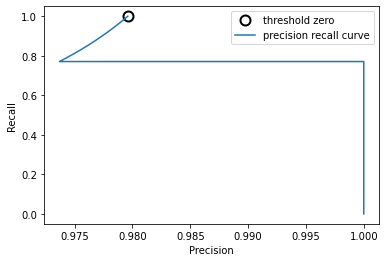

In [53]:
#pass necessary parameters to precision_recall_curve method  
precision, recall, thresholds = precision_recall_curve(ytest ,pred2)

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

**Q5** Train Ridge Regression Model on the training set, and evaluate
1. Now, Create a Ridge Regression passing ```alpha = 100```
2. Fit the model with the train data
3. Predict the values with the test data
4. Print the coefficients of the model
5. Calculate the test MSE 
6. Get the score from the model using test data
7. Plot Precision-Recall Curve from the true & predicted test data

**A5** Replace ??? with code in the code cell below

In [57]:
ridge3 = Ridge(alpha = 100)
ridge3.fit(xtrain,ytrain)             
pred3 = ridge3.predict(xtest)

#print model coefficients      
print(pd.Series(ridge3.coef_, index = df.columns)) 
mse = mean_squared_error(ytest, pred3)      
print("Test mean squared error (MSE): {:.2f}".format(mse))

#print score
print(ridge3.score(xtest, ytest))


Sample code number            -0.005360
Clump Thickness                0.082332
Uniformity of Cell Size        0.055674
Uniformity of Cell Shape       0.057688
Marginal Adhesion              0.037537
Single Epithelial Cell Size    0.023271
Bare Nuclei                    0.135765
Bland Chromatin                0.054714
Normal Nucleoli                0.045838
Mitoses                        0.006558
dtype: float64
Test mean squared error (MSE): 0.03
0.846805444478338


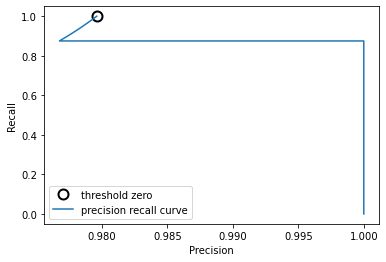

In [55]:
#pass necessary parameters to precision_recall_curve method  
precision, recall, thresholds = precision_recall_curve(ytest ,pred3)

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

**Q6** Train Ridge Regression Model on the training set, and evaluate
1. Now, Create a Ridge Regression passing ```alpha = 0```
2. Fit the model with the train data
3. Predict the values with the test data
4. Print the coefficients of the model
5. Calculate the test MSE 
6. Get the score from the model using test data
7. Plot Precision-Recall Curve from the true & predicted test data

**A6** Replace ??? with code in the code cell below

In [58]:
ridge4 = Ridge(alpha = 0)
ridge4.fit(xtrain, ytrain)    
pred4 = ridge4.predict(xtest)  

#print model coefficients      
print(pd.Series(ridge4.coef_, index = df.columns)) 
mse = mean_squared_error(ytest, pred4)   
print("Test mean squared error (MSE): {:.2f}".format(mse))

#print score      
print("Test mean squared error (MSE): {:.2f}".format(mse))
print(ridge4.score(xtest, ytest))

Sample code number            -0.004197
Clump Thickness                0.088481
Uniformity of Cell Size        0.065116
Uniformity of Cell Shape       0.048488
Marginal Adhesion              0.026220
Single Epithelial Cell Size    0.013646
Bare Nuclei                    0.173741
Bland Chromatin                0.048471
Normal Nucleoli                0.047323
Mitoses                        0.003577
dtype: float64
Test mean squared error (MSE): 0.03
Test mean squared error (MSE): 0.03
0.8467604517795323


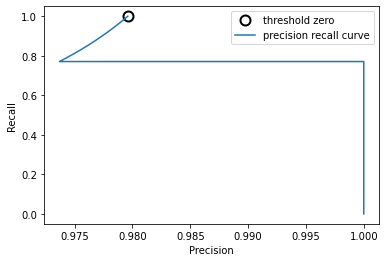

In [59]:
#pass necessary parameters to precision_recall_curve method  
precision, recall, thresholds = precision_recall_curve(ytest ,pred4)

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

**Q7** **Study the codes above and answer the following questions:***

1. Why when passing alpha = 100, the coefficients become very small? 
2. Does alpha = 4 improve the MSE comparing to regular least squares?
3. How the size of alphas affects MSE and the Score of the models? 


**A7** Your answers:

1. The larger is the alpha, the higher is the smoothness constraints. Higher alpha makes coefficients much smaller with less flexibility of the fit.

2. No, the performemce degrades comparing with the Regular Least Squares(RLS) (Which basically is the fit with alpha=0). alpha=0 or RLS achieves MSE=0.04

3. The higher value of alpha makes the model less flexible with the test data and the model becomes overfitted. The smaller value of alpha helps to generalized the model. So, the Score and MSE also increases with the test data.


# Lasso Regularization

**Q8 Create a Lasso Regression passing ```max_iter = 10000```**

1. set the alphas from the 3rd question for setting parameters in Lasso
2. Fit the model with the train data
3. Predict the values with the test data
4. Print the coefficients of the model
5. Calculate the test MSE 
6. Get the score from the model using test data
7. Plot Precision-Recall Curve from the true & predicted test data


**A8** 

Replace ??? with code in the code cell below


In [61]:
#Lasso regression
lasso = Lasso(max_iter = 10000 )
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(xtrain), ytrain)
    coefs.append(lasso.coef_)


pred1_lasso = lasso.predict(xtest)           # Use this model to predict the test data
print(pd.Series(lasso.coef_, df.columns)) # Print coefficients
mse = mean_squared_error(ytest, pred1_lasso)         # Calculate the test MSE
print("Test mean squared error (MSE): {:.2f}".format(mse))

print(lasso.score(xtest, ytest))

Sample code number            -0.000071
Clump Thickness                0.087095
Uniformity of Cell Size        0.066409
Uniformity of Cell Shape       0.048510
Marginal Adhesion              0.025139
Single Epithelial Cell Size    0.012832
Bare Nuclei                    0.173783
Bland Chromatin                0.046542
Normal Nucleoli                0.045659
Mitoses                        0.000863
dtype: float64
Test mean squared error (MSE): 0.03
0.8461051318867808


In [62]:
#pass necessary parameters to precision_recall_curve method  
precision, recall, thresholds = precision_recall_curve(ytest ,lasso)

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

TypeError: Expected sequence or array-like, got <class 'sklearn.linear_model._coordinate_descent.Lasso'>

## ElasticNet

**Q9 Create a ElasticNet passing ```max_iter = 10000```**

1. Use Cross Validation 15 times for searching best value of alpha for ElasticNet.
2. Fit the model with the train data
3. Print the ```best_alpha``` value
3. Create a new ElasticNet using best value of alpha
4. Fit the model with the train data
4. Print the coefficients of the model
5. Calculate the test MSE 
6. Get the score from the model using test data
7. Plot Precision-Recall Curve from the true & predicted test data


**A9** 

Replace ??? with code in the code cell below


In [63]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

enetcv = ElasticNetCV(cv = 15, max_iter = 10000)
enetcv.fit(xtrain, ytrain)
print("Best alpha: {:.2f}".format(enetcv.alpha_))

enet = ElasticNet(max_iter = 10000)
enet.set_params(alpha = enetcv.alpha_)
enet.fit(xtrain, ytrain)
mse = mean_squared_error(ytest, enet.predict(xtest))
print("Test mean squared error (MSE): {:.2f}".format(mse))

print(pd.Series(enet.coef_, df.columns))

Best alpha: 0.01
Test mean squared error (MSE): 0.03
Sample code number            -0.000000
Clump Thickness                0.085611
Uniformity of Cell Size        0.065678
Uniformity of Cell Shape       0.050153
Marginal Adhesion              0.025481
Single Epithelial Cell Size    0.013106
Bare Nuclei                    0.170406
Bland Chromatin                0.046998
Normal Nucleoli                0.045474
Mitoses                        0.000103
dtype: float64


In [65]:
#pass necessary parameters to precision_recall_curve method  
precision, recall, thresholds = precision_recall_curve(ytest ,enet.decision_function(xtest))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

AttributeError: 'ElasticNet' object has no attribute 'decision_function'


**Q10 Observe the lasso.coef and ridge.coef, and discuss the findings below**


**A10**  

Your answer goes here: 

Answer: In the Lasso regression, the model works better when coefficients of the model is smaller. But on the otherhand, in Ridge regression, the model performs better with higher values of coefficients.

**Q11**

1. Is it a good choice to use Lasso regression when most of the columns are significantly useful for the target value? Give explanation supporting your answer.

**A11** 

Your answer goes here.

Answer: Lasso regression is a good fit for dataset where many columns are not useful for our goal task. Lasso regression helps us to remove most of the not useful columns. But if all the columns are mostly related to the target then dropping many columns may hurt the performence of the task. In that case we should go for Ridge regression.